### Importing Basic Libraries:

In [142]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
sns.set()
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/exploring-risk-factors-for-cardiovascular-diseas/heart_data.csv


### Importing the Data:

In [3]:
df = pd.read_csv(r"/kaggle/input/exploring-risk-factors-for-cardiovascular-diseas/heart_data.csv",index_col=0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
index,,,,,,,,,,,,,
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Data Exploration:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.5 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Checking for Null Values:

In [6]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

- So there are no null values.

In [7]:
### Droping the Id column
df.drop(['id'],axis=1,inplace=True)

In [8]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
index,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Data Wrangling:

In [14]:
## I think the age column is in days. Let's convert it into years.
df['age'] = df['age'] // 365
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
index,,,,,,,,,,,,
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [16]:
## Let's convert gender into 0 and 1 form. Supposing 2 is for female and 1 for male.
df['gender'] = df['gender'].map({2:0,1:1})
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
index,,,,,,,,,,,,
0,50,0,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,0,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


### Data Visualization:

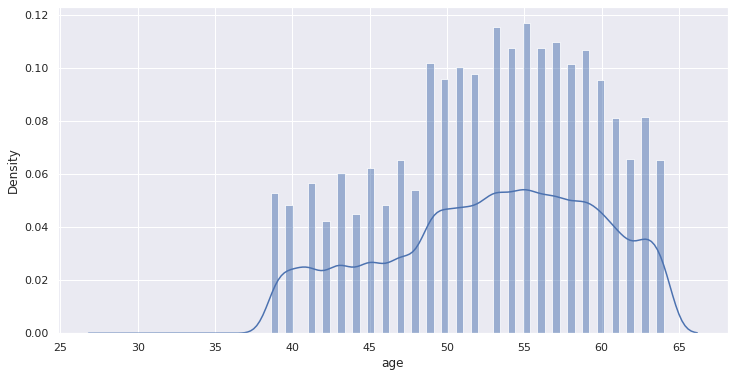

In [44]:
## Let's see the distribution of age
plt.figure(figsize=(12,6))
sns.histplot(df['age'],kde=True,stat='density',kde_kws=dict(cut=3))
plt.show()

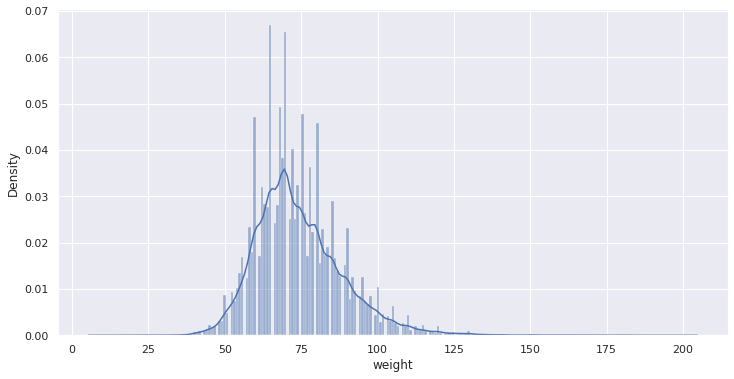

In [54]:
## Let's see the distribution of weight
plt.figure(figsize=(12,6))
sns.histplot(df['weight'],kde=True,stat='density',kde_kws=dict(cut=3))
plt.show()

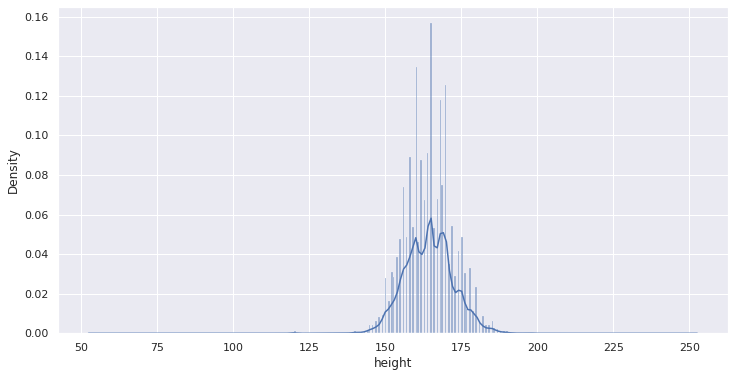

In [57]:
## Let's see the distribution of weight
plt.figure(figsize=(12,6))
sns.histplot(df['height'],kde=True,stat='density',kde_kws=dict(cut=3))
plt.show()

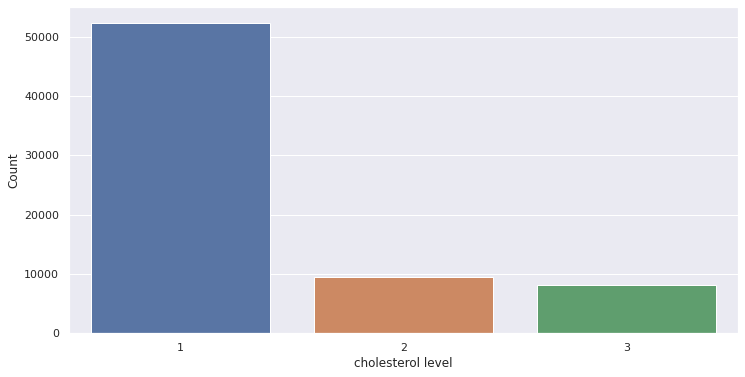

In [85]:
chol = df['cholesterol'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=chol.index, y=chol.values)
plt.xlabel('cholesterol level')
plt.ylabel('Count')
plt.show()

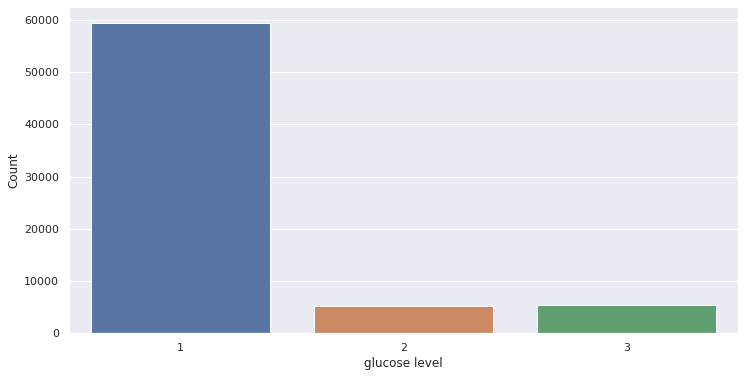

In [86]:
g = df['gluc'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=g.index, y=g.values)
plt.xlabel('glucose level')
plt.ylabel('Count')
plt.show()

In [36]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

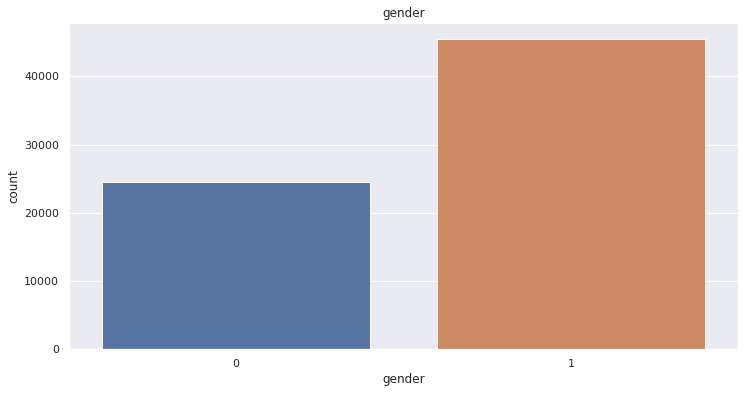

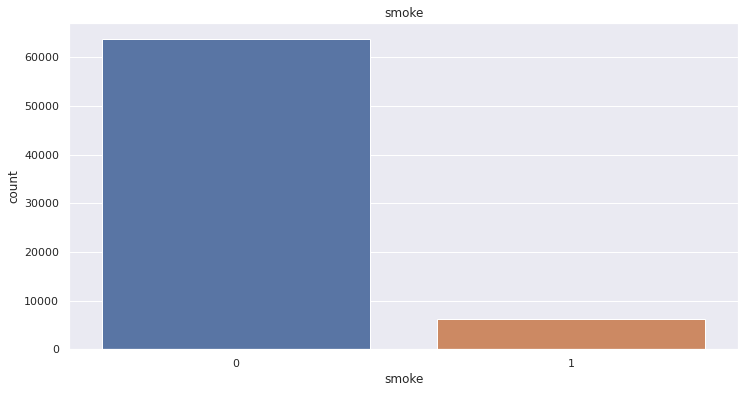

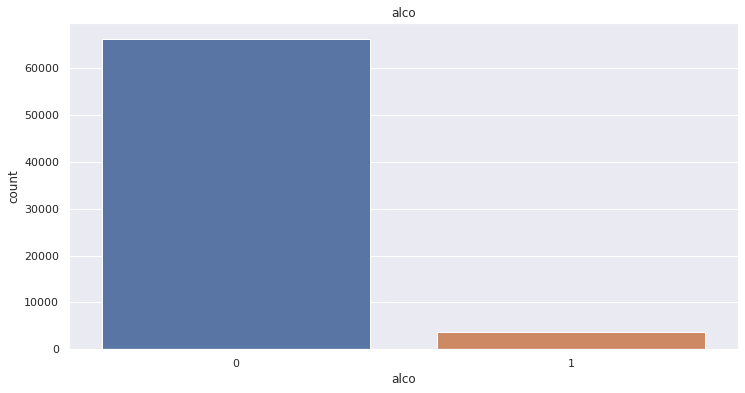

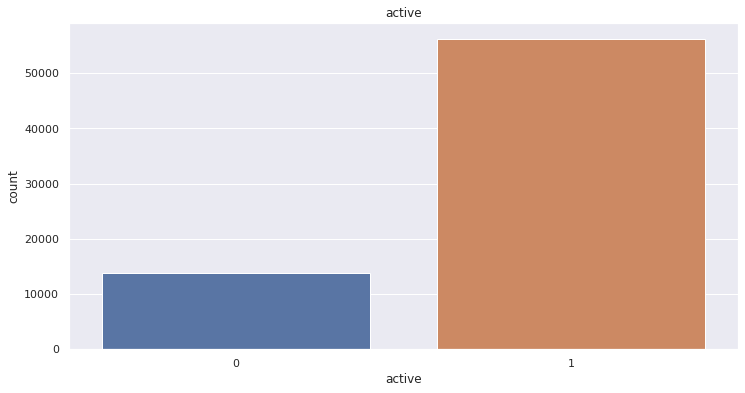

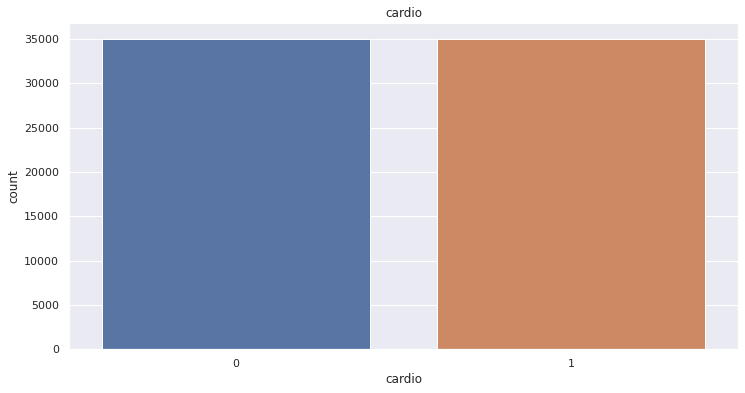

In [40]:
## Let's visualize some categorical features
features = ['gender','smoke','alco', 'active', 'cardio']
for col in features:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col,data=df)
    plt.title(col)
    plt.show()

In [67]:
## Let's add a column with feature_names of target feature cardio
df['cardio_name'] = df['cardio'].map({0:'No',1:'Yes'})
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,cardio_name
index,,,,,,,,,,,,,
0,50,0,168,62.0,110,80,1,1,0,0,1,0,No
1,55,1,156,85.0,140,90,3,1,0,0,1,1,Yes
2,51,1,165,64.0,130,70,3,1,0,0,0,1,Yes
3,48,0,169,82.0,150,100,1,1,0,0,1,1,Yes
4,47,1,156,56.0,100,60,1,1,0,0,0,0,No


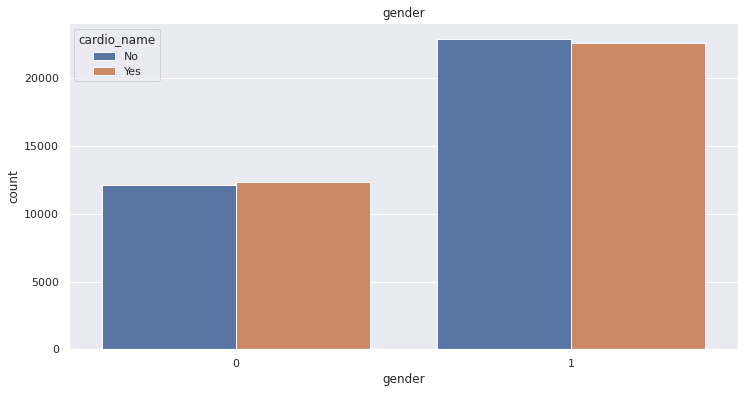

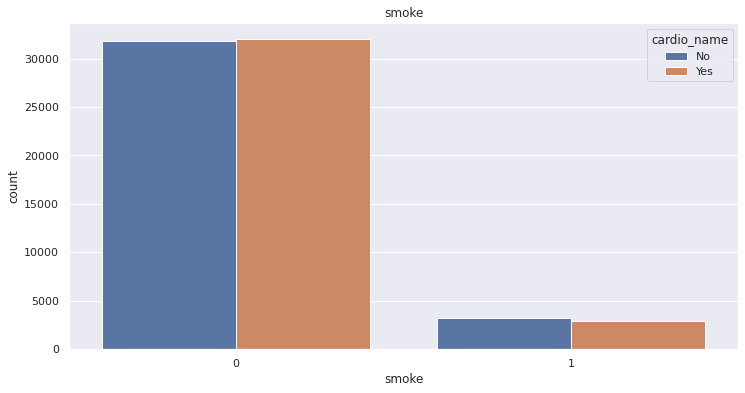

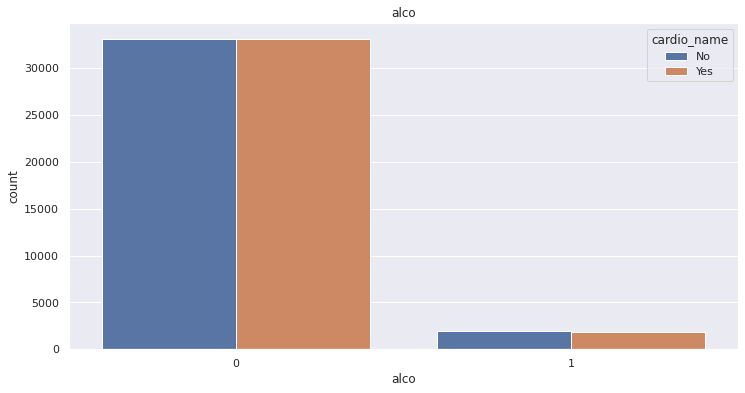

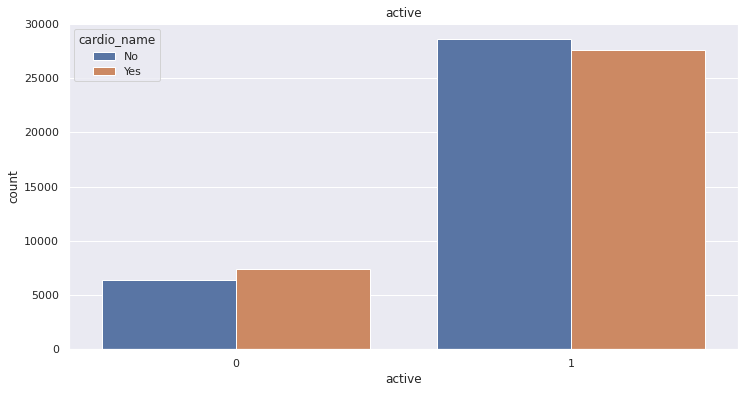

In [68]:
## Let's visualize categorical features with respect to target feature names
features = ['gender','smoke','alco', 'active']
for col in features:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col,hue='cardio_name',data=df)
    plt.title(col)
    plt.show()

#### Objectives:
- So gender plays a important role in it as most of the mens have more risk for getting this disease.
- Similar with active which is suprising that those who are physically active have more risk.
- And for other features like smoke and alcohol_consumption it dosn't have much risk for getting this disease. The one reason can be imbalanced data in these features as most of the values are 0.

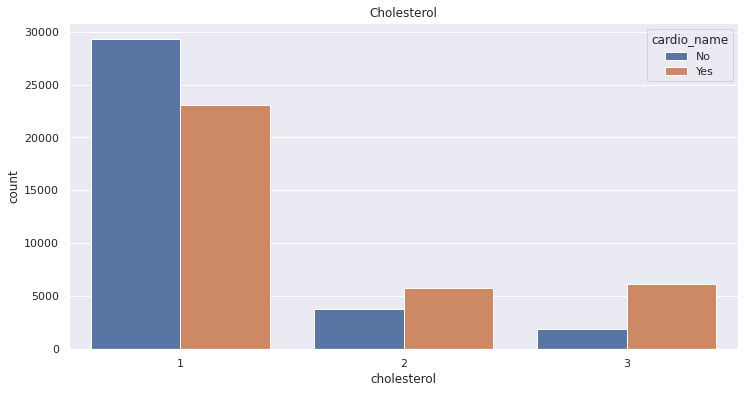

In [84]:
plt.figure(figsize=(12,6))
sns.countplot(x='cholesterol',hue='cardio_name',data=df)
plt.title('Cholesterol')
plt.show()

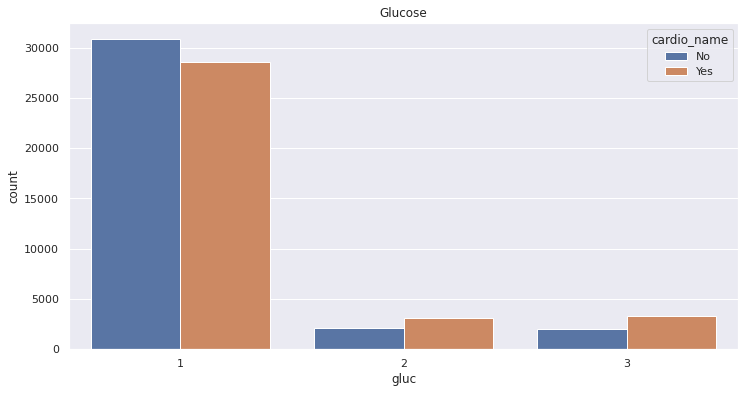

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(x='gluc',hue='cardio_name',data=df)
plt.title('Glucose')
plt.show()

### Train the Model:

In [87]:
X = df.drop(['cardio','cardio_name'],axis=1)
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
index,,,,,,,,,,,
0,50,0,168,62.0,110,80,1,1,0,0,1
1,55,1,156,85.0,140,90,3,1,0,0,1
2,51,1,165,64.0,130,70,3,1,0,0,0
3,48,0,169,82.0,150,100,1,1,0,0,1
4,47,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,52,0,168,76.0,120,80,1,1,1,0,1
69996,61,1,158,126.0,140,90,2,2,0,0,1
69997,52,0,183,105.0,180,90,3,1,0,1,0


In [154]:
y = df['cardio']
y

index
0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [193]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [194]:
print(len(X_train))
print(len(X_test))

52500
17500


### Scaling the training and testing data:

In [195]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.transform(X_test)

### Using XGBClassifier

In [196]:
from xgboost import XGBClassifier

In [197]:
model = XGBClassifier(objective="binary:logistic")
model.fit(x_train_scale,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [198]:
model.score(x_test_scale,y_test)

0.7366857142857143

In [199]:
y_pred = model.predict(x_test_scale)

In [200]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[6767, 2030],
       [2578, 6125]])

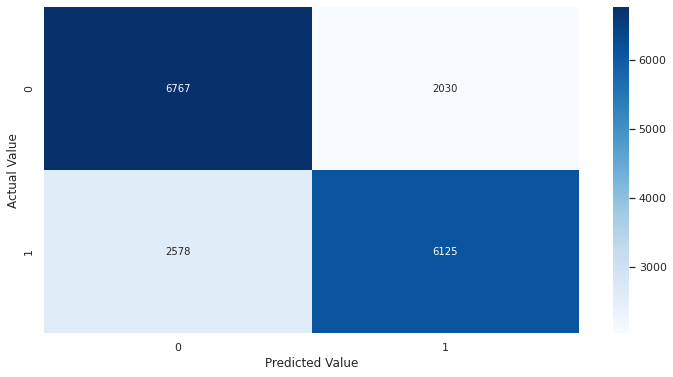

In [201]:
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [202]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      8797
           1       0.75      0.70      0.73      8703

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500



- So XGBClassifier give us 74% of accuracy.

### RandomizedSearchCV:
- Let's improve it using RandomizedSearchCV

In [211]:
params = {
    "max_depth": [2,3, 4, 5,6, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5]
}

In [212]:
rmcv_model = RandomizedSearchCV(XGBClassifier(objective="binary:logistic"),
                                param_distributions=params,cv=5,n_iter=5)

In [213]:
rmcv_model.fit(x_train_scale,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constra

In [214]:
rmcv_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=10, ...)

In [215]:
rmcv_model.best_score_

0.7354666666666667

In [216]:
y_pred = rmcv_model.best_estimator_.predict(x_test_scale)

In [217]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      8797
           1       0.76      0.70      0.73      8703

    accuracy                           0.74     17500
   macro avg       0.74      0.74      0.74     17500
weighted avg       0.74      0.74      0.74     17500



- It does not change the accuracy alot. We can use GridSearchCV to improve too.
- So our accuracy is 74%.